# Ejercicio de Regresión 1 (Core)

Objetivo

 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

Descripción del problema: Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

Instrucciones:

- Carga de datos: Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
    - SqFt: Tamaño de la casa en pies cuadrados.
    - Bedrooms: Número de habitaciones.
    - Bathrooms: Número de baños.
    - price: Precio de venta de la casa.
- Exploración de datos: Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.
- Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
- Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
- Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.
- Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
    - Tamaño: 2000 pies cuadrados
    - Habitaciones: 3
    - Baños: 2

## Regresion Lineal

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/house-prices.csv', encoding='ISO-8859-1')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [22]:
df.dtypes.value_counts()

int64     6
object    2
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [24]:
df.drop_duplicates().head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


{'whiskers': [<matplotlib.lines.Line2D at 0x26ec6838e00>,
 'caps': [<matplotlib.lines.Line2D at 0x26ec68381a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ec5ff0dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ec6839760>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ec6839a90>],
 'means': []}

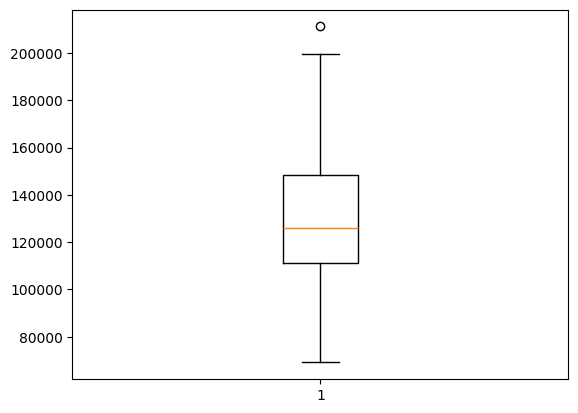

In [25]:
plt.boxplot(df['Price'])

In [32]:
df_num = df.select_dtypes(int)

In [34]:
# Cálculo de la correlación de Pearson
correlation_matrix = df_num.corr(method='pearson')
print(correlation_matrix)

               Home     Price      SqFt  Bedrooms  Bathrooms    Offers
Home       1.000000  0.086313  0.154361 -0.080881   0.119673 -0.057224
Price      0.086313  1.000000  0.531726  0.516275   0.518797 -0.335503
SqFt       0.154361  0.531726  1.000000  0.473160   0.516233  0.336429
Bedrooms  -0.080881  0.516275  0.473160  1.000000   0.407857  0.110926
Bathrooms  0.119673  0.518797  0.516233  0.407857   1.000000  0.141157
Offers    -0.057224 -0.335503  0.336429  0.110926   0.141157  1.000000


In [26]:
df.query('Price > 200000')

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
103,104,211200,2440,4,3,3,Yes,West


In [27]:
df = df.query('Price < 200000')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Crear un Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('El R2 es:', r2)
print('El MSE es:', mse)

El R2 es: 0.826454056882266
El MSE es: 121900110.38659461


## KNN Regresion

In [44]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

# Exploración de datos
print(df.head())
print(df.describe())

# Separar variables predictoras y objetivo
X = df[['SqFt', 'Bedrooms']]
y = df['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo KNN
knn = KNeighborsRegressor(n_neighbors=17)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  127.000000     127.000000   127.000000  127.000000  127.000000   
mean    64.188976  129791.338583  1997.480315    3.015748    2.440945   
std     37.073443   25989.866840   208.748989    0.723574    0.514142   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.500000  111250.000000  1880.000000    3.000000    2.000000   
50%     64.000000  125700.000000  2000.000000    3.000000    2.000000   
75%     95.500000  147800.000000  2140.000000    3.000000    3.000000

### Ajustar Hiperparametro
Para seleccionar el mejor valor de K, podemos usar la validación cruzada.

In [43]:
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 17


### Visualización de Resultados
Podemos visualizar cómo cambia el MSE con diferentes valores de K.

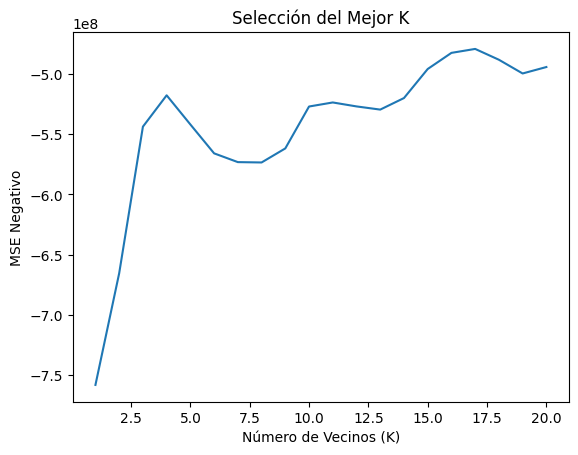

In [45]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

## Tree Decision

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Exploración de datos
print(df.head())
print(df.describe())

# Separar variables predictoras y objetivo
X = df[['SqFt', 'Bedrooms']]
y = df['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo Árbol de Decisión
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  127.000000     127.000000   127.000000  127.000000  127.000000   
mean    64.188976  129791.338583  1997.480315    3.015748    2.440945   
std     37.073443   25989.866840   208.748989    0.723574    0.514142   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.500000  111250.000000  1880.000000    3.000000    2.000000   
50%     64.000000  125700.000000  2000.000000    3.000000    2.000000   
75%     95.500000  147800.000000  2140.000000    3.000000    3.000000

Poda del Árbol

Podemos ajustar el modelo para evitar el sobreajuste limitando la profundidad del árbol o el número mínimo de muestras en una hoja.

In [47]:
# Entrenamiento del modelo con poda
tree_pruned = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_pruned.fit(X_train, y_train)

# Realizar predicciones
y_pred_pruned = tree_pruned.predict(X_test)

# Evaluar el modelo podado
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)
print(f'Error Cuadrático Medio (Podado): {mse_pruned}')
print(f'R-cuadrado (Podado): {r2_pruned}')

Error Cuadrático Medio (Podado): 485588333.6571141
R-cuadrado (Podado): 0.21687881125400388
